## basic config

In [1]:

def align_faces_2(root_path):
    import os 
    current_path = os.getcwd()
    temp_path = "/home/bean/DragVideo/stylegan3-editing"
    os.chdir(temp_path)
    command =f"""python prepare_data/preparing_faces_parallel.py \
                --mode align \
                --root_path  {root_path} 
                """
    import subprocess
    subprocess.run(command, shell=True)
    os.chdir(current_path)

In [2]:

# ==== IMP ==================================================================
#  this import is must to avoid the error
# RuntimeError: GET was unable to find an engine to execute this computation
# import torch  # now not needed on .182
# ============================================================================

# # torch.cuda.is_available()
# print(torch.cuda.device_count())
# print(torch.__version__)


# why this is not working
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# --------------------------------  configs   ------------------------------------------------

# DRAGVIDEO_ROOT_PATH = "/Ext_4T_SSD/ASHOK/"
DRAGVIDEO_ROOT_PATH = "/home/bean/"
EXPERIMENT_NAME_POSTFIX = "MAN_SPEAKING_QUAD_VALUES"#"aligned_sg3_&_new_e4e_reconstruction_invstep_200_pti_step_450"

# keep temp paths here
#---------------------------------
sg3_path = f"{DRAGVIDEO_ROOT_PATH}DragVideo/Data_store/OLD/model_weights/stylegan3_3rdtime_weights/stylegan3-r-ffhqu-1024_module.pkl"
#defualt path ::  "stylegan2_ada_ffhq":  f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/pretrained_models/ffhq.pkl",

# sg3_path = f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/pretrained_models/ffhq.pkl"
sg3_aligned = f"{DRAGVIDEO_ROOT_PATH}DragVideo/Data_store/OLD/model_weights/stylegan3_3rdtime_weights/stylegan3-r-ffhq-1024_module.pkl"


new_e4e = f"{DRAGVIDEO_ROOT_PATH}DragVideo/Data_store/OLD/model_weights/restyle_e4e_ffhq.pt"
old_e4e_with_pti = f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/pretrained_models/e4e_ffhq_encode.pt",

obama_video = "/home/bean/DragVideo/Data_store/OLD/original_videos/obama.mp4"
man_speaking = f"{DRAGVIDEO_ROOT_PATH}DragVideo/Data_store/OLD/original_videos/person_speaking_original.mp4",

# --------------------------------  

import datetime
lazy_config = {
    "EXP_NAME": str(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))+EXPERIMENT_NAME_POSTFIX,
    "e4e": new_e4e,
    "stylegan2_ada_ffhq":  sg3_aligned,
    "video_path":  obama_video,#man_speaking,
    "model_name" : "stylegan3", # stylegan2 or stylegan3
    "n_frames" : 115,
    "IMAGE_SIZE": 1024,
    "N_STEPS_in_draggan":  "100",
    
}

env_config = {
    "DragGAN_dir": f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN",
    "Experiment_base_path":f"{DRAGVIDEO_ROOT_PATH}DragVideo/Data_store/experiments/" ,
    "init_exp_dir_shell_path": f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/init_datadirs.sh",
    "dummy_config_path" : f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/configs/dummy",
    
    
}

#hyper parameters in PTI
hyper_config = {
    "max_pti_steps": 450,
    "first_inv_steps": 200,
    "max_images_to_invert": 200,
}


# ----------------------------------------------------------------------------------------------

from run_utils import *

# create experiment data folder structure
Experiment_name = lazy_config["EXP_NAME"]
Experiment_base_path = env_config["Experiment_base_path"]
Experiment_path = os.path.join(Experiment_base_path, Experiment_name)

init_experiment_dir(Experiment_name,Experiment_base_path,shell_script_path=env_config["init_exp_dir_shell_path"])



# dummy paths_config overwrites the paths_config.py
# dummy_config_path = f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_PTI/configs/dummy'
add_dummy_config_from_dict("hyperparameters.py", hyper_config,ROOT_PATH=env_config["dummy_config_path"])

# change path configs , hyperparameters 
paths_config_dict = {
    #pretrained models
    "e4e": lazy_config["e4e"],
    "stylegan2_ada_ffhq": lazy_config["stylegan2_ada_ffhq"],
    
    # to store tuned stylegan weights
    "checkpoints_dir": os.path.join(Experiment_path,'tuned_SG'),
    # to store latents
    "embedding_base_dir": os.path.join(Experiment_path,'latents'),
    # aligned / processed images
    "input_data_path": os.path.join(Experiment_path,'aligned'),
     "quad_values_path": os.path.join(Experiment_path,'quad_values'),
}

add_dummy_config_from_dict("paths_config.py", paths_config_dict,ROOT_PATH=env_config["dummy_config_path"])



# add all these configs to log.txt
# --------------------------------  
with open(os.path.join(Experiment_path,'log.txt'), 'a') as f:
    import json
    f.write(f"lazy_config: {json.dumps(lazy_config, indent=4)}\n")
    f.write(f"env_config: {json.dumps(env_config, indent=4)}\n")
    f.write(f"hyper_config: {json.dumps(hyper_config, indent=4)}\n")
    
    



In [3]:


from importlib.machinery import SourceFileLoader
# imports the module from the given path
video_utils = SourceFileLoader("video_utils","../utils_draggan/video_utils.py").load_module()
raw_path = os.path.join(Experiment_path, "raw")
from utils.align_data import pre_process_images

video_utils.extract_frames(lazy_config['video_path'], raw_path,n_frames=lazy_config['n_frames'])


 int(cam.get(cv2.CAP_PROP_FRAME_COUNT))= 119 ,n_frames=500 
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/000.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/001.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/002.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/003.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/004.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/005.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/006.jpg
Creating.../home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/007.jpg
Creating.../home/bean/DragVideo/Data_store/experimen

# start

In [17]:
# from utils.align_data import pre_process_images


In [20]:
# # # delete this cell 
# # "/home/bean/DragVideo/Data_store/man_speaking/aligned": input_data_path 
# # "/home/bean/DragVideo/Data_store/man_speaking/quad_values", quad_pkl_path

# raw_path = "/home/bean/DragVideo/Data_store/man_speaking/raw"
# pre_process_images(raw_path, IMAGE_SIZE=1024) # o/p: config.input_data_path ,quad pickle dir


100%|██████████| 200/200 [02:39<00:00,  1.25it/s]


saving aligned images...
saving quad values...
done!


In [19]:
pre_process_images(raw_path, IMAGE_SIZE=lazy_config['IMAGE_SIZE']) # o/p: config.input_data_path ,quad pickle dir
#
# align_faces_2(os.path.join(Experiment_path,'raw'))



NameError: name 'lazy_config' is not defined

In [5]:


from utils.align_data import pre_process_images
from scripts.run_pti import run_PTI

from run_utils_2 import load_generators,export_updated_pickle
from configs import paths_config

use_multi_id_training = True
model_id = run_PTI(use_wandb=False, use_multi_id_training=use_multi_id_training)


generator_type =paths_config.multi_id_model_type if use_multi_id_training else "__"
old_G, new_G = load_generators(model_id, generator_type)
sg_tuned_pkl = export_updated_pickle(new_G,model_id,name = lazy_config["model_name"])

print(sg_tuned_pkl) # 'QBUXQCXZGWET'



#get landmarks
landmark_path = f"{DRAGVIDEO_ROOT_PATH}DragVideo/DragGAN/_facial-landmarks-recognition"
os.chdir(landmark_path)
print("pwd",os.getcwd())
import sys
sys.path.append(landmark_path)

from main import landmarks, dict_landmarks,show_landmarks,get_landmarks_dir

# to store landmarks
landmarks_dir =  os.path.join(Experiment_path,'landmarks')
processed_images_dir =  os.path.join(Experiment_path,'aligned')

# generate landmarks for all images in processed_images_dir
get_landmarks_dir(processed_images_dir,landmarks_dir)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/lpips/weights/v0.1/alex.pth
current_directory:  /home/bean/DragVideo/DragGAN/_PTI
current_directory:  /home/bean/DragVideo/DragGAN/_PTI
torch.Size([3, 1024, 1024]) 3 1024 1024
Setting up PyTorch plugin "bias_act_plugin"... Done.


  0%|          | 0/200 [00:00<?, ?it/s]

Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


/home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %106 : int = prim::profile_ivalue(%104)
 does not have profile information (Triggered internally at /opt/conda/conda-bld/pytorch_1682343964576/work/third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
100%|██████████| 1/1 [00:00<00:00, 15.87it/s]


Exporting large updated pickle based off new generator and ffhq.pkl
/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-00-05check_landmarks/tuned_SG/stylegan3_OTOUOCMYGNNX.pkl
pwd /home/bean/DragVideo/DragGAN/_facial-landmarks-recognition
landmark_path:  /home/bean/DragVideo/Data_store/experiments/2023-08-16_02-00-05check_landmarks/landmarks/000.pkl
sg_tuned_pkl: /home/bean/DragVideo/Data_store/experiments/2023-08-16_02-00-05check_landmarks/tuned_SG/stylegan3_OTOUOCMYGNNX.pkl
intiating global state....
calling init_images......
Loading "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-00-05check_landmarks/tuned_SG/stylegan3_OTOUOCMYGNNX.pkl"... Done.
()
{'z_dim': 512, 'w_dim': 512, 'channel_base': 65536, 'channel_max': 1024, 'mapping_kwargs': {}, 'conv_kernel': 1, 'filter_size': 6, 'magnitude_ema_beta': 0.9988915792636801, 'output_scale': 0.25, 'c_dim': 0, 'img_resolution': 1024, 'img_channels': 3, 'use_radial_filters': True}
ws.shape: torch.Size([1, 16, 512]), self.num

/home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343964576/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ws.shape: torch.Size([1, 16, 512]), self.num_ws: 16, self.w_dim: 512
Current Source:
    [252, 498]
    [252, 568]
    [257, 638]
    [266, 710]
    [285, 783]
    [319, 851]
    [363, 912]
    [419, 961]
    [496, 975]
    [576, 959]
    [643, 915]
    [700, 858]
    [750, 794]
    [781, 723]
    [794, 646]
    [801, 573]
    [808, 497]
    [293, 464]
    [322, 426]
    [368, 407]
    [418, 406]
    [466, 421]
    [549, 420]
    [599, 405]
    [653, 407]
    [703, 427]
    [736, 464]
    [503, 468]
    [499, 514]
    [496, 559]
    [492, 608]
    [429, 634]
    [460, 644]
    [496, 655]
    [535, 641]
    [572, 630]
    [340, 494]
    [370, 488]
    [399, 485]
    [432, 489]
    [400, 492]
    [371, 495]
    [591, 486]
    [622, 483]
    [651, 486]
    [682, 492]
    [650, 491]
    [621, 489]
    [373, 732]
    [413, 699]
    [462, 688]
    [502, 693]
    [543, 685]
    [597, 692]
    [646, 722]
    [602, 783]
    [548, 815]
    [503, 822]
    [460, 819]
    [411, 792]
    [390, 734]


0

In [3]:
# clean all data from gpu
import torch
torch.cuda.empty_cache()

import os 
Experiment_path = "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames"
sg_tuned_pkl = "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames/tuned_SG/stylegan3_EGXIYKSTDCRR.pkl"



os.chdir(env_config["DragGAN_dir"])
import subprocess

print(f"sg_tuned_pkl: {sg_tuned_pkl}")

subprocess.call(['python', 'run_dragvideo.py', '--Experiment_path', Experiment_path, '--N_STEPS', lazy_config["N_STEPS_in_draggan"], '--CHECKPOINT_PATH', sg_tuned_pkl,"--MAX_SIZE",str(lazy_config["IMAGE_SIZE"]) ])


sg_tuned_pkl: /home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames/tuned_SG/stylegan3_EGXIYKSTDCRR.pkl
intiating global state....
calling init_images......
Loading "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames/tuned_SG/stylegan3_EGXIYKSTDCRR.pkl"... Done.
()
{'z_dim': 512, 'w_dim': 512, 'channel_base': 65536, 'channel_max': 1024, 'mapping_kwargs': {}, 'conv_kernel': 1, 'filter_size': 6, 'magnitude_ema_beta': 0.9988915792636801, 'output_scale': 0.25, 'c_dim': 0, 'img_resolution': 1024, 'img_channels': 3, 'use_radial_filters': True}
ws.shape: torch.Size([1, 16, 512]), self.num_ws: 16, self.w_dim: 512
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
ws.shape: torch.Size([1, 16, 512]), self.num_ws: 16, self.w_dim: 512
Running with:
    Source: [array([252, 498]), array([252, 568]), array([257, 638]), array([266, 710]), array([285, 783]), array([319, 851]), array([363, 912]), array([419, 961]), array([496, 975]), array([5

/home/bean/.conda/envs/stylegan3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343964576/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ws.shape: torch.Size([1, 16, 512]), self.num_ws: 16, self.w_dim: 512
Current Source:
    [252, 498]
    [252, 568]
    [257, 638]
    [266, 710]
    [285, 783]
    [319, 851]
    [363, 912]
    [419, 961]
    [496, 975]
    [576, 959]
    [643, 915]
    [700, 858]
    [750, 794]
    [781, 723]
    [794, 646]
    [801, 573]
    [808, 497]
    [293, 464]
    [322, 426]
    [368, 407]
    [418, 406]
    [466, 421]
    [549, 420]
    [599, 405]
    [653, 407]
    [703, 427]
    [736, 464]
    [503, 468]
    [499, 514]
    [496, 559]
    [492, 608]
    [429, 634]
    [460, 644]
    [496, 655]
    [535, 641]
    [572, 630]
    [340, 494]
    [370, 488]
    [399, 485]
    [432, 489]
    [400, 492]
    [371, 495]
    [591, 486]
    [622, 483]
    [651, 486]
    [682, 492]
    [650, 491]
    [621, 489]
    [373, 732]
    [413, 699]
    [462, 688]
    [502, 693]
    [543, 685]
    [597, 692]
    [646, 722]
    [602, 783]
    [548, 815]
    [503, 822]
    [460, 819]
    [411, 792]
    [390, 734]


# post processing

In [1]:
import os
from utils.de_alignment import put_back_the_edited_image
# import tqdm
from tqdm import tqdm
os.getcwd()

'/home/bean/DragVideo/DragGAN/_PTI'

In [2]:
raw_image_path = "/home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/raw/082.jpg"
# aligned_image_path = "/home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/aligned/000.jpg"
aligned_image_path2 = "/home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/aligned/082.jpg"
quad = "/home/bean/DragVideo/Data_store/experiments/2023-08-18_03-45-37MAN_SPEAKING_QUAD_VALUES/quad_values/082.pkl"

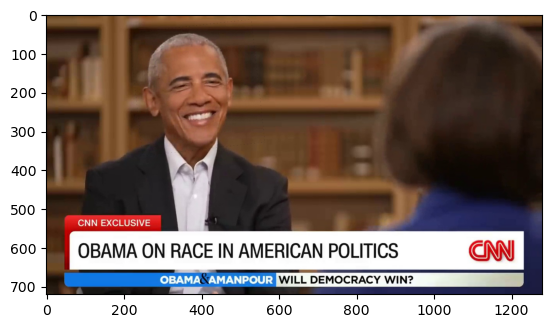

In [3]:
img = put_back_the_edited_image(raw_image_path,aligned_image_path2,quad,save_path='del.jpg',show=True)


In [25]:
# to paste_edited faces back for a folder of images:

# dir_path = "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames_SAVE_____________"


def paste_edited_faces_back(dir_path):
    raw_dir = os.path.join(dir_path,'raw')
    edited_dir = os.path.join(dir_path,'after_drag')
    quad_dir = os.path.join(dir_path,'quad_values')
    save_dir = os.path.join(dir_path,'edit_pasted')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # for i in tqdm(range(1,61)):
    #     raw_image_path_i = os.path.join(raw_image_path,str(i)+'.png')
    #     aligned_image_path_i = os.path.join(aligned_image_path,str(i)+'.png')
    #     quad_pkl_path_i = os.path.join(quad_pkl_path,str(i)+'.pkl')
    #     save_path_i = os.path.join(save_path,str(i)+'.png')
    #     put_back_the_edited_image(raw_image_path_i,aligned_image_path_i,quad_pkl_path_i,save_path_i)
    # name = "000"
    
    # get names from edited_dir
    names = [name.split('.')[0] for name in os.listdir(edited_dir)]
    for name in tqdm(names):
        raw_image = os.path.join(raw_dir,name+'.jpg')
        edited_image = os.path.join(edited_dir,name+'.jpg')# png')
        quad_path = os.path.join(quad_dir,name+'.pkl')
        save_path = os.path.join(save_dir,name+'.png')
        put_back_the_edited_image(raw_image,edited_image,quad_path,save_path=save_path)


In [26]:
dir_path = "/home/bean/DragVideo/Data_store/man_speaking"
paste_edited_faces_back(dir_path)

100%|██████████| 124/124 [00:10<00:00, 12.01it/s]


In [27]:


from importlib.machinery import SourceFileLoader
# imports the module from the given path
video_utils = SourceFileLoader("video_utils","../utils_draggan/video_utils.py").load_module()

In [28]:
# dir_path = "/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames_SAVE_____________/edit_pasted"
dir_path="/home/bean/DragVideo/Data_store/man_speaking/edit_pasted"
video_utils.make_video(dir_path,video_name="pasted_back")

avi file deleted
avi file deleted


ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

In [ ]:
video_utils.video_side_by_side("/home/bean/DragVideo/Data_store/OLD/original_videos/obama.mp4",
'/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames_SAVE_____________/edit_pasted/pasted_back.mp4',
'/home/bean/DragVideo/Data_store/experiments/2023-08-16_02-03-44obama_60_frames_SAVE_____________/edit_pasted/obama_side_by_side')

In [29]:
v2 = "/home/bean/DragVideo/Data_store/man_speaking/edit_pasted/pasted_back.mp4"
v1 = "/home/bean/DragVideo/Data_store/OLD/original_videos/person_speaking_original.mp4"
v3 = "/home/bean/DragVideo/Data_store/man_speaking/videos"
video_utils.video_side_by_side(v1,v2,v3)

Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/000.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/001.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/002.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/003.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/004.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/005.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/006.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/007.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/008.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/009.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/010.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/011.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/012.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/videos/013.jpg
Creati

ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

avi file deleted
avi file deleted
frames deleted


frame=  124 fps=0.0 q=31.0 Lsize=     886kB time=00:00:05.12 bitrate=1415.5kbits/s speed=16.9x    
video:884kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.156059%


In [12]:
video_path="/home/bean/DragVideo/Data_store/OLD/original_videos/man_results/man_124_edited.mp4" # need 124 frames 
output_path="/home/bean/DragVideo/Data_store/man_speaking/after_drag"

In [13]:
video_utils.extract_frames(video_path, output_path)# n_frames=1000, n_digits_in_name=5)

 int(cam.get(cv2.CAP_PROP_FRAME_COUNT))= 125 ,n_frames=125 
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/000.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/001.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/002.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/003.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/004.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/005.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/006.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/007.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/008.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/009.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/010.jpg
Creating.../home/bean/DragVideo/Data_store/man_speaking/after_drag/011.jpg
Creating.../home/bean/DragVideo/Data_sto